<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-data-for-Bayesian-MCA" data-toc-modified-id="Generate-data-for-Bayesian-MCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate data for Bayesian MCA</a></span><ul class="toc-item"><li><span><a href="#Get-genes-from-model" data-toc-modified-id="Get-genes-from-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get genes from model</a></span></li></ul></li><li><span><a href="#transcript-to-protein-map-for-Aspni7" data-toc-modified-id="transcript-to-protein-map-for-Aspni7-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>transcript to protein map for Aspni7</a></span><ul class="toc-item"><li><span><a href="#Map-uniprot-to-protein-and-transcript-ID" data-toc-modified-id="Map-uniprot-to-protein-and-transcript-ID-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Map uniprot to protein and transcript ID</a></span></li><li><span><a href="#Download-the-data-from-EDD" data-toc-modified-id="Download-the-data-from-EDD-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Download the data from EDD</a></span></li><li><span><a href="#Reference-strain" data-toc-modified-id="Reference-strain-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Reference strain</a></span></li></ul></li><li><span><a href="#Internal-Metabolomics-at-120-hours" data-toc-modified-id="Internal-Metabolomics-at-120-hours-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Internal Metabolomics at 120 hours</a></span><ul class="toc-item"><li><span><a href="#Convert-Metabolomics-CIDs-to-Model-Ids" data-toc-modified-id="Convert-Metabolomics-CIDs-to-Model-Ids-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convert Metabolomics CIDs to Model Ids</a></span><ul class="toc-item"><li><span><a href="#Make-a-dict-with-kegg-compound-and-list-of-model-metabolites-as-values" data-toc-modified-id="Make-a-dict-with-kegg-compound-and-list-of-model-metabolites-as-values-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Make a dict with kegg compound and list of model metabolites as values</a></span></li><li><span><a href="#Add-pubchem-annotation-to-matched-model-metabolites" data-toc-modified-id="Add-pubchem-annotation-to-matched-model-metabolites-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Add pubchem annotation to matched model metabolites</a></span></li><li><span><a href="#Add-model-IDs-to-data" data-toc-modified-id="Add-model-IDs-to-data-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Add model IDs to data</a></span></li><li><span><a href="#find-by-map-to-pubchem" data-toc-modified-id="find-by-map-to-pubchem-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>find by map to pubchem</a></span></li><li><span><a href="#Map-data-to-model-by-InChI" data-toc-modified-id="Map-data-to-model-by-InChI-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Map data to model by InChI</a></span></li></ul></li></ul></li><li><span><a href="#Global-proteomics-at-120-hours" data-toc-modified-id="Global-proteomics-at-120-hours-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Global proteomics at 120 hours</a></span><ul class="toc-item"><li><span><a href="#Convert-to-reactions" data-toc-modified-id="Convert-to-reactions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Convert to reactions</a></span></li></ul></li><li><span><a href="#Targeted-proteomics-at-120-hours" data-toc-modified-id="Targeted-proteomics-at-120-hours-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Targeted proteomics at 120 hours</a></span><ul class="toc-item"><li><span><a href="#Map-to-JGI-transcripts" data-toc-modified-id="Map-to-JGI-transcripts-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Map to JGI transcripts</a></span></li></ul></li><li><span><a href="#External-metabolomics-at-72,-120-and-168-hours" data-toc-modified-id="External-metabolomics-at-72,-120-and-168-hours-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>External metabolomics at 72, 120 and 168 hours</a></span><ul class="toc-item"><li><span><a href="#Bug-in-3HP-72-hour-data." data-toc-modified-id="Bug-in-3HP-72-hour-data.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Bug in 3HP 72 hour data.</a></span></li></ul></li></ul></div>

# Generate data for Bayesian MCA

In [1]:
%load_ext nb_black
from edd_utils import login, export_study
import pandas as pd
import cobra, gzip, re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import gzip
from tqdm import tqdm
import numpy as np


/Users/zuck016/.pyenv/versions/anaconda3-2020.11/envs/idp_new/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

## Get genes from model

In [2]:
model = cobra.io.load_json_model(
    "../models/iJB1325_HP.nonnative_genes.pubchem.flipped.nonzero.reduced.json"
)
len(model.metabolites)

Restricted license - for non-production use only - expires 2022-01-13


171

<IPython.core.display.Javascript object>

In [ ]:
model.metabolites.

# transcript to protein map for Aspni7



In [3]:
prot_gene_re = re.compile(r"proteinId=(\d+);.*transcriptId=(\d+)")

<IPython.core.display.Javascript object>

In [4]:
prot_gene_map, gene_prot_map = {}, {}
prot_gene_re = re.compile(r"proteinId=(\d+);.*transcriptId=(\d+)")
with gzip.open("../data/Aspni7_FilteredModels1_deflines.gff3.gz", "rt") as gff3:
    for line in gff3:
        m = prot_gene_re.search(line)
        # print(line)
        if m:
            gene_prot_map[m.group(2)] = m.group(1)
            prot_gene_map[m.group(1)] = m.group(2)
prot_gene_map

{'35362': '35362',
 '35369': '35369',
 '35382': '35382',
 '35417': '35417',
 '35418': '35418',
 '35423': '35423',
 '35424': '35424',
 '35429': '35429',
 '35446': '35446',
 '35451': '35451',
 '35461': '35461',
 '35469': '35469',
 '35470': '35470',
 '35492': '35492',
 '35532': '35532',
 '35593': '35593',
 '35596': '35596',
 '35638': '35638',
 '35736': '35736',
 '35737': '35737',
 '35738': '35738',
 '35746': '35746',
 '35773': '35773',
 '35781': '35781',
 '35792': '35792',
 '35817': '35817',
 '35819': '35819',
 '35835': '35835',
 '35848': '35848',
 '35910': '35910',
 '35912': '35912',
 '35931': '35931',
 '35934': '35934',
 '35961': '35961',
 '35965': '35965',
 '35970': '35970',
 '35999': '35999',
 '36011': '36011',
 '36015': '36015',
 '36017': '36017',
 '36034': '36034',
 '36045': '36045',
 '36069': '36069',
 '36070': '36070',
 '36108': '36108',
 '36143': '36143',
 '36148': '36148',
 '36150': '36150',
 '36151': '36151',
 '36195': '36195',
 '36202': '36202',
 '36203': '36203',
 '36208': '3

<IPython.core.display.Javascript object>

In [114]:
[gene for gene in genes2rxns if gene in gene_prot_map]

['1128503',
 '1145456',
 '1155770',
 '1143538',
 '1146031',
 '1126547',
 '1128684',
 '1146884',
 '1145051',
 '1141976',
 '1144773',
 '1145793',
 '1148178',
 '1145895',
 '1124768',
 '1183468',
 '1113563',
 '1184650',
 '1031996',
 '1120162',
 '1147250',
 '1145327',
 '1142568',
 '1139065',
 '178461',
 '1000708',
 '1144775',
 '1167742',
 '1148430',
 '1144228',
 '1184284',
 '1185167',
 '1141647',
 '1114699',
 '1148603',
 '1175567',
 '1181034',
 '1218960',
 '1148375',
 '1148025',
 '1146854',
 '1037649',
 '1144385',
 '1145655',
 '1141712',
 '1215111',
 '1136340',
 '1133804',
 '1143651',
 '1144118',
 '48047',
 '1172632',
 '1102128',
 '1183763',
 '1103567',
 '1147138',
 '1111634',
 '1117686',
 '1145545',
 '1164153',
 '1137712',
 '1145644',
 '1151044',
 '1118068',
 '1082822',
 '1106057',
 '1121815',
 '1153588',
 '1187201',
 '1189342',
 '1180995',
 '1187871',
 '1183555',
 '1082059',
 '1149680',
 '42017',
 '1176225',
 '1124003',
 '1176774',
 '1123449',
 '1173314',
 '1144646',
 '1005336',
 '1019169

## Map uniprot to protein and transcript ID

In [7]:
uniprot_aniger = (
    pd.read_csv("../data/Uniprot_ANiger.csv", index_col="Entry name")["ID"]
    .str.split("|")
    .str.get(-1)
    .to_frame("ID")
)
uniprot_aniger["Transcript"] = uniprot_aniger["ID"].replace(
    to_replace=prot_gene_map, value=None
)
uniprot_aniger.to_csv('../data/uniprot_to_transcript_map.csv', columns=['Transcript'])
display(uniprot_aniger)

,ID,Transcript
Entry name,,
A7U8C7,PAND_Tribolium_castaneum,PAND_Tribolium_castaneum
C2ZAL1,BAPAT_Bacillus_cereus,BAPAT_Bacillus_cereus
P3983,HPDH_escherichia_coli,HPDH_escherichia_coli
ABF_005934,PAND_Tribolium_castaneum,PAND_Tribolium_castaneum
ABF_005935,BAPAT_Bacillus_cereus,BAPAT_Bacillus_cereus
...,...,...
G3XM75,56950,56950
G3Y8S4,57046,57046
G3Y7D7,57150,57150


<IPython.core.display.Javascript object>

In [140]:
uniprot_aniger[uniprot_aniger['ID'] == '1141371']

,ID,Transcript
Entry name,,
G3XLU7,1141371,1141647


## Download the data from EDD

In [3]:
study_slug = "aniger_3hp_omics_shakeflask-93_pnnl"
edd_server = "edd.agilebiofoundry.org"
user = "zucker"

<IPython.core.display.Javascript object>

In [6]:
session = login(edd_server=edd_server, user=user)

Password for zucker:  ················


<IPython.core.display.Javascript object>

In [4]:
df = export_study(session, study_slug, edd_server=edd_server)
df.groupby(["Line ID", "Line Name", "Line Description"]).count()

  0%|          | 0/298861 [00:00<?, ?it/s]

,,,Study ID,Study Name,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
Line ID,Line Name,Line Description,,,,,,,,,,,
45009,SF ABF93_1-R1,ATCC11414 Parent,5712,5712,5712,5712,5712,5712,70,5712,5712,5712,5712
45010,SF ABF93_1-R2,ATCC11414 Parent,5938,5938,5938,5938,5938,5938,70,5938,5938,5938,5938
45011,SF ABF93_1-R3,ATCC11414 Parent,5997,5997,5997,5997,5997,5997,70,5997,5997,5997,5997
45012,SF ABF93_2-R1,3HP-9,5972,5972,5972,5972,5972,5972,70,5972,5972,5972,5972
45013,SF ABF93_2-R2,3HP-9,5652,5652,5652,5652,5652,5652,70,5652,5652,5652,5652
45014,SF ABF93_2-R3,3HP-9,5808,5808,5808,5808,5808,5808,70,5808,5808,5808,5808
45015,SF ABF93_3-R1,3HP+AAT,5904,5904,5904,5904,5904,5904,70,5904,5904,5904,5904
45016,SF ABF93_3-R2,3HP+AAT,5820,5820,5820,5820,5820,5820,70,5820,5820,5820,5820
45017,SF ABF93_3-R3,3HP+AAT,5886,5886,5886,5886,5886,5886,70,5886,5886,5886,5886


<IPython.core.display.Javascript object>

In [15]:
df.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,HPLC,45063,SF ABF93_1-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,81.62472,72.0
1,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,HPLC,45063,SF ABF93_1-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,56.79776,120.0
2,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,HPLC,45063,SF ABF93_1-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,65.36000,168.0
3,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45010,SF ABF93_1-R2,ATCC11414 Parent,HPLC,45064,SF ABF93_1-R2,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,79.45385,72.0
4,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45010,SF ABF93_1-R2,ATCC11414 Parent,HPLC,45064,SF ABF93_1-R2,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,43.84099,120.0


<IPython.core.display.Javascript object>

,Line Name,growth_rate,glucose_uptake_rates (mmol/gDCW * hr),3hp_secretion_rates (mmol/gDCW * hr)
0,SF ABF93_1-R1,0.044352,9.921248,0.000000
1,SF ABF93_1-R2,0.042139,12.940007,0.000000
2,SF ABF93_1-R3,0.043531,11.712062,0.000000
3,SF ABF93_2-R1,0.047123,9.533116,2.091163
4,SF ABF93_2-R2,0.039356,17.345820,4.184230
5,SF ABF93_2-R3,0.040425,16.149776,3.618712
6,SF ABF93_3-R1,0.040535,16.032110,3.858735
7,SF ABF93_3-R2,0.040227,16.339861,3.867200
8,SF ABF93_3-R3,0.039690,18.535344,4.762692
9,SF ABF93_4-R1,0.041304,16.979623,5.599254


<IPython.core.display.Javascript object>

# Plot Heatmaps

In [21]:
boundary_data = pd.read_csv("Line_rates.csv")
boundary_data.drop(
    columns=[
        "Omics Sample ID",
        "Strain (ICE)",
        "Genotype",
    ]
)

boundary_data = boundary_data.melt(
    id_vars=["Line Name"],
    value_vars=[
        "growth_rate",
        "glucose_uptake_rates (mmol/gDCW * hr)",
        "3hp_secretion_rates (mmol/gDCW * hr)",
    ],
    var_name="Formal Type",
    value_name="Value",
)
boundary_data["exp"] = df["Line Name"].str.split("-").apply(lambda x: "-".join(x[:2]))
boundary_data["Protocol"] = "Extracellular Fluxes"
boundary_data

,Line Name,Formal Type,Value,exp,Protocol
0,SF ABF93_1-R1,growth_rate,0.044352,SF ABF93_1-R1,Extracellular Fluxes
1,SF ABF93_1-R2,growth_rate,0.042139,SF ABF93_1-R1,Extracellular Fluxes
2,SF ABF93_1-R3,growth_rate,0.043531,SF ABF93_1-R1,Extracellular Fluxes
3,SF ABF93_2-R1,growth_rate,0.047123,SF ABF93_1-R2,Extracellular Fluxes
4,SF ABF93_2-R2,growth_rate,0.039356,SF ABF93_1-R2,Extracellular Fluxes
...,...,...,...,...,...
148,SF ABF93_15-R2,3hp_secretion_rates (mmol/gDCW * hr),9.741029,SF ABF93_17-R2,Extracellular Fluxes
149,SF ABF93_15-R3,3hp_secretion_rates (mmol/gDCW * hr),10.610720,SF ABF93_17-R2,Extracellular Fluxes
150,SF ABF93_17-R1,3hp_secretion_rates (mmol/gDCW * hr),4.997250,SF ABF93_17-R3,Extracellular Fluxes
151,SF ABF93_17-R2,3hp_secretion_rates (mmol/gDCW * hr),4.958145,SF ABF93_17-R3,Extracellular Fluxes


<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
eflux_data = pd.read_csv("../data/Eflux2_flux_rates.flipped.csv", index_col=0)
nz_eflux_data = eflux_data[eflux_data !=0].dropna()



<IPython.core.display.Javascript object>

In [17]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_docstrings',
 '_warn_if_gui_ou

<IPython.core.display.Javascript object>

/Users/zuck016/.pyenv/versions/anaconda3-2020.11/envs/idp_new/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


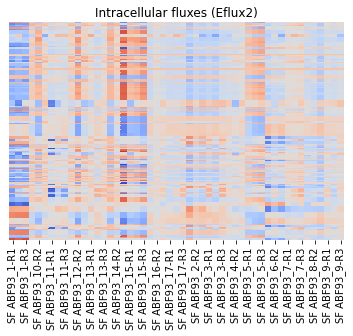

<IPython.core.display.Javascript object>

In [26]:
import seaborn as sns
sns.heatmap(nz_eflux_data.transform(lambda x: (x - x.mean()) / x.std(), 1), cmap='coolwarm', center=0,  cbar=False)
ax = plt.axes()
ax.set_title('Intracellular fluxes (Eflux2)')
ax.yaxis.set_visible(False)
plt.savefig('../figures/eflux2_data.svg')


In [24]:
dfa = df.append(boundary_data)
dfa['exp'] = dfa['Line Name'].str.split('-').apply(lambda x: '-'.join(x[:2]))
dfa['Protocol'] = dfa['Protocol'].replace({
    'PNNL Global Metabolomics (extracellular)': 'PNNL Global Metabolomics\n(extracellular)',
    'PNNL Global Metabolomics (intracellular)': 'PNNL Global Metabolomics\n(intracellular)',
    'HPLC': 'HPLC Metabolomics\n(extracellular)'
})

fig, axs = plt.subplots(ncols=5, figsize=(20,4))

for ax, (name, idf) in zip(axs, dfa.groupby('Protocol')):
    pivot = idf.pivot_table(values='Value', columns='exp', index='Formal Type')
    sns.heatmap(pivot.transform(lambda x: (x - x.mean()) / x.std(), 1), cmap='coolwarm', center=0, ax=ax, cbar=False)
    ax.set_title(name)
    ax.yaxis.set_visible(False)
    
plt.savefig('exp_data_w_fluxes.svg')


NameError: name 'df' is not defined

<IPython.core.display.Javascript object>

In [10]:
df

NameError: name 'df' is not defined

<IPython.core.display.Javascript object>

In [49]:
df.groupby(
    [
        "Protocol",
    ]
).count()

,Study ID,Study Name,Line ID,Line Name,Line Description,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
Protocol,,,,,,,,,,,,,
HPLC,306,306,306,306,306,306,306,306,306,306,306,306,306
PNNL Global Metabolomics (intracellular),2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907,2907
PNNL Global Prot Intensity,292644,292644,292644,292644,292644,292644,292644,292644,306,292644,292644,292644,292644
Targeted Proteomics,3004,3004,3004,3004,3004,3004,3004,3004,51,3004,3004,3004,3004


<IPython.core.display.Javascript object>

## Reference strain

![3HP](StrainsBy3HPvsTime.jpg)


**Best performing strain: [panD+,bapat+, hpdh+,pyc+,$\Delta$ald6 (3HP+PYC+3op1D)](https://registry.agilebiofoundry.org/entry/8348)**

In [9]:
reference_strain = "SF ABF93_7-R3"

<IPython.core.display.Javascript object>

# Internal Metabolomics at 120 hours

In [51]:
internal_metab = df[df["Protocol"] == "PNNL Global Metabolomics (intracellular)"]
internal_metab.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
3310,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,PNNL Global Metabolomics (intracellular),46240,SF ABF93_1-R1,cid:14900,1-Palmitoyl-rac-glycerol,0,counts,164715.7045,1.0
3311,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45010,SF ABF93_1-R2,ATCC11414 Parent,PNNL Global Metabolomics (intracellular),46241,SF ABF93_1-R2,cid:14900,1-Palmitoyl-rac-glycerol,0,counts,201977.8968,1.0
3312,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45011,SF ABF93_1-R3,ATCC11414 Parent,PNNL Global Metabolomics (intracellular),46242,SF ABF93_1-R3,cid:14900,1-Palmitoyl-rac-glycerol,0,counts,150123.3314,1.0
3313,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45012,SF ABF93_2-R1,3HP-9,PNNL Global Metabolomics (intracellular),46243,SF ABF93_2-R1,cid:14900,1-Palmitoyl-rac-glycerol,0,counts,188257.8142,1.0
3314,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45013,SF ABF93_2-R2,3HP-9,PNNL Global Metabolomics (intracellular),46244,SF ABF93_2-R2,cid:14900,1-Palmitoyl-rac-glycerol,0,counts,209980.6886,1.0


<IPython.core.display.Javascript object>

In [113]:
import numpy as np

normalized_internal_metab = (
    internal_metab.set_index(["Measurement Type", "Formal Type", "Line Name"])["Value"]
    .unstack()
    .apply(np.log2)
)
normalized_internal_metab = (
    normalized_internal_metab.sub(normalized_internal_metab[reference_strain], axis=0)
    .replace(-np.inf, 0)
    .fillna(0)
    .replace(np.inf, 0)
)
normalized_internal_metab

,Line Name,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
Measurement Type,Formal Type,,,,,,,,,,,,,,,,,,,,,
"(1S,2R,4S,5S)-6-[(2R,3R,4S,5R,6R)-3,4,5-trihydroxy-6-methylol-tetrahydropyran-2-yl]oxycyclohexane-1,2,3,4,5-pentol",cid:11727586,-1.959075,0.000000,-0.078922,-0.853756,-0.094756,-0.904397,0.106334,-0.460177,0.005258,-1.167276,...,0.153362,0.005365,-0.033289,0.0,0.159875,0.005721,-0.068941,-0.587076,-0.612524,-1.278790
"(2R,3R,4R,5R)-hexane-1,2,3,4,5,6-hexol",cid:6251,-0.544022,-0.569916,0.063486,-0.103061,-0.297648,-0.161703,-0.701674,-0.248329,-0.051807,-0.185847,...,0.015707,-0.012180,0.102425,0.0,-0.110606,-0.138440,-0.132544,-0.044500,-0.215153,-0.159968
"(2R,3R,4S,5R)-2-adenin-9-yl-5-methylol-tetrahydrofuran-3,4-diol",cid:60961,-2.405182,-1.391174,-0.995859,-1.217824,-0.060109,-0.968332,-0.282518,-0.674158,0.055353,-1.143886,...,0.266623,0.389166,-0.269014,0.0,0.429297,-0.530966,0.031438,-0.342743,-0.768083,-1.277334
"(2R,3S,4S,5R,6R)-2-methylol-6-[(2R,3R,4S,5S,6R)-3,4,5-trihydroxy-6-methylol-tetrahydropyran-2-yl]oxy-tetrahydropyran-3,4,5-triol",cid:7427,-0.767383,-0.648230,-0.333403,0.033285,-0.165826,-0.116006,-0.052038,-0.487081,-0.179344,-0.553755,...,0.204260,0.302972,0.006208,0.0,0.286248,-0.095086,-0.004988,-0.002468,-0.159171,-0.421687
"(2R,4R)-pentane-1,2,3,4,5-pentol",cid:94154,-2.963872,-0.293565,-0.536156,-1.800644,-0.272179,-1.228698,-0.633371,-1.216555,-0.376251,-1.193621,...,0.095655,0.293351,0.060226,0.0,-0.304055,-0.985559,-0.829650,-0.962517,-1.081043,-2.189466
"(2S)-2,5-diammoniopentanoate",cid:6992088,-0.752378,0.355753,0.433667,-0.450360,0.102332,-0.164533,-0.009866,-0.546326,0.229864,-0.634233,...,0.413589,-0.054702,-0.199691,0.0,0.450409,0.257115,0.276419,0.175737,-0.185150,-0.088678
(2S)-2-ammonio-3-hydroxypropanoate,cid:6857581,-2.489900,-4.402278,0.523571,-1.379670,-0.644430,-0.596543,-1.700870,-1.083394,-0.140653,-1.392045,...,0.714563,0.203389,-0.253875,0.0,0.796569,0.275378,0.123798,-0.630236,-1.036385,-0.557287
(2S)-2-azaniumyl-3-(4-hydroxyphenyl)propanoate,cid:6942100,2.686721,2.889632,3.309223,0.159618,0.008170,0.372515,2.925808,2.640397,2.241722,2.567164,...,1.983872,2.635824,0.497125,0.0,2.384198,1.695278,1.712990,0.742526,2.509340,0.729847
(2S)-2-azaniumyl-3-methylbutanoate,cid:6971018,-2.267587,-3.579287,0.009215,-1.549778,-1.216943,-0.971653,-2.030052,-0.730957,-1.133487,-1.990215,...,-0.076515,-0.692629,-0.457877,0.0,-0.513619,-0.109456,-0.000488,-1.039830,-1.150285,-1.003209


<IPython.core.display.Javascript object>

In [114]:
normalized_internal_metab.to_csv("normalized_internal_metabolites.csv")

<IPython.core.display.Javascript object>

## Convert Metabolomics CIDs to Model Ids

In [64]:
metab = pd.read_excel(
    "Multiomics/210525_Aspergillus_niger_3HP_ABFSF93_multiomics_data_fixed.xlsx",
    sheet_name="Intra_metabolites_NOTnormalized",
    engine="openpyxl",
)
metab.head()

,Metabolite,Result,BioCyc Common-Name,Kegg,PubChem,An_ZD_SF93_M_52,An_ZD_SF93_M_53,An_ZD_SF93_M_54,An_ZD_SF93_M_55,An_ZD_SF93_M_56,...,An_ZD_SF93_M_94,An_ZD_SF93_M_95,An_ZD_SF93_M_96,An_ZD_SF93_M_97,An_ZD_SF93_M_98,An_ZD_SF93_M_99,An_ZD_SF93_M_100,An_ZD_SF93_M_101,An_ZD_SF93_M_102,Unnamed: 56
0,1-monopalmitin*,unknown,NaN,NaN,14900,164716,201978,150123,188258,209981,...,108966,136761,90354.5,92629.3,121539,132566,32987.7,125742,106431,NaN
1,2-hydroxyglutaric acid,success,2-hydroxyglutarate,C02630,4609868,30897,126606,69139,290079,373933,...,136549,693559,240951,532703,377536,734484,290421,607122,531238,NaN
2,2-keto-gluconic acid,unknown,NaN,NaN,6857381,0,0,0,0,0,...,0,7477.81,0,0,75907.8,27602.9,0,0,36211,NaN
3,3-amino-2-piperidone*,unknown,NaN,NaN,12025,0,0,1.08444e+06,1.38936e+06,2.07159e+06,...,0,338312,0,0,0,0,0,0,0,NaN
4,3-hydroxypropionic acid,success,3-hydroxypropanoate,C01013,5459847,191537,164535,255570,2.4787e+07,3.12136e+07,...,6.04685e+07,5.51137e+07,4.08597e+07,4.8729e+07,6.16981e+07,6.34226e+07,3.37659e+07,3.82916e+07,5.65614e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Unknown 052,NaN,NaN,NaN,NaN,130521,188084,357435,134129,117528,...,43679.5,205164,17815.1,8395.47,19572.9,2837.05,68722.1,78160.3,40351.9,NaN
110,Unknown 053,NaN,NaN,NaN,NaN,40316.1,37012.1,94098.7,90255.3,106441,...,28436.2,94005.3,45919.6,27613.2,10323.5,44109,9804.97,76397.7,44457.1,NaN
111,strain details,NaN,NaN,NaN,NaN,ATCC11414 Parent,ATCC11414 Parent,ATCC11414 Parent,3HP-9,3HP-9,...,3HP+PYC+3HP+uga2,3HP+PYC+3HP+uga2,3HP+PYC+3HP+uga2,an4104(PYC+3OP2D),an4104(PYC+3OP2D),an4104(PYC+3OP2D),4077-7,4077-7,4077-7,NaN
112,replicate,NaN,NaN,NaN,NaN,1,2,3,1,2,...,1,2,3,1,2,3,1,2,3,NaN


<IPython.core.display.Javascript object>

In [ ]:
chebi

In [80]:
pubchem_metabs = metab[~metab["PubChem"].isnull()].set_index("PubChem")
pubchem_metabs

,Metabolite,Result,BioCyc Common-Name,Kegg,An_ZD_SF93_M_52,An_ZD_SF93_M_53,An_ZD_SF93_M_54,An_ZD_SF93_M_55,An_ZD_SF93_M_56,An_ZD_SF93_M_57,...,An_ZD_SF93_M_94,An_ZD_SF93_M_95,An_ZD_SF93_M_96,An_ZD_SF93_M_97,An_ZD_SF93_M_98,An_ZD_SF93_M_99,An_ZD_SF93_M_100,An_ZD_SF93_M_101,An_ZD_SF93_M_102,Unnamed: 56
PubChem,,,,,,,,,,,,,,,,,,,,,
14900,1-monopalmitin*,unknown,NaN,NaN,164716,201978,150123,188258,209981,183554,...,108966,136761,90354.5,92629.3,121539,132566,32987.7,125742,106431,NaN
4609868,2-hydroxyglutaric acid,success,2-hydroxyglutarate,C02630,30897,126606,69139,290079,373933,177884,...,136549,693559,240951,532703,377536,734484,290421,607122,531238,NaN
6857381,2-keto-gluconic acid,unknown,NaN,NaN,0,0,0,0,0,39946.1,...,0,7477.81,0,0,75907.8,27602.9,0,0,36211,NaN
12025,3-amino-2-piperidone*,unknown,NaN,NaN,0,0,1.08444e+06,1.38936e+06,2.07159e+06,0,...,0,338312,0,0,0,0,0,0,0,NaN
5459847,3-hydroxypropionic acid,success,3-hydroxypropanoate,C01013,191537,164535,255570,2.4787e+07,3.12136e+07,1.9562e+07,...,6.04685e+07,5.51137e+07,4.08597e+07,4.8729e+07,6.16981e+07,6.34226e+07,3.37659e+07,3.82916e+07,5.65614e+07,NaN
6992099,4-aminobutyric acid (GABA),unknown,NaN,NaN,4.9328e+06,8.80208e+06,1.83479e+07,3.24642e+07,2.14437e+07,7.28219e+06,...,4.5358e+06,2.68834e+07,1.05474e+07,2.84361e+07,1.38276e+07,4.5471e+07,8.27499e+06,1.15975e+07,2.40811e+07,NaN
3037032,4-hydroxybutanoic acid*,unknown,NaN,NaN,480045,447910,671931,627584,612794,599478,...,309667,1.02337e+06,245760,517291,327334,428583,488688,585579,351183,NaN
190,adenine,success,adenine,C00147,0,137783,0,228378,353322,186986,...,0,0,0,0,0,0,0,0,0,NaN
164533,a-ketoglutaric acid,success,2-oxoglutarate,C00026,50842,328612,18364,242601,140038,253556,...,111845,159748,35461,148290,82832,48628,37048,322772,69251,NaN


<IPython.core.display.Javascript object>

In [70]:
kegg_metabs = metab[~metab["Kegg"].isnull()].set_index("Kegg")
kegg_met

,Metabolite,Result,BioCyc Common-Name,PubChem,An_ZD_SF93_M_52,An_ZD_SF93_M_53,An_ZD_SF93_M_54,An_ZD_SF93_M_55,An_ZD_SF93_M_56,An_ZD_SF93_M_57,...,An_ZD_SF93_M_94,An_ZD_SF93_M_95,An_ZD_SF93_M_96,An_ZD_SF93_M_97,An_ZD_SF93_M_98,An_ZD_SF93_M_99,An_ZD_SF93_M_100,An_ZD_SF93_M_101,An_ZD_SF93_M_102,Unnamed: 56
Kegg,,,,,,,,,,,,,,,,,,,,,
C02630,2-hydroxyglutaric acid,success,2-hydroxyglutarate,4609868,30897,126606,69139,290079,373933,177884,...,136549,693559,240951,532703,377536,734484,290421,607122,531238,NaN
C01013,3-hydroxypropionic acid,success,3-hydroxypropanoate,5459847,191537,164535,255570,2.4787e+07,3.12136e+07,1.9562e+07,...,6.04685e+07,5.51137e+07,4.08597e+07,4.8729e+07,6.16981e+07,6.34226e+07,3.37659e+07,3.82916e+07,5.65614e+07,NaN
C00147,adenine,success,adenine,190,0,137783,0,228378,353322,186986,...,0,0,0,0,0,0,0,0,0,NaN
C00026,a-ketoglutaric acid,success,2-oxoglutarate,164533,50842,328612,18364,242601,140038,253556,...,111845,159748,35461,148290,82832,48628,37048,322772,69251,NaN
C00099,Beta- alanine,success,beta-alanine,4755801,991454,804199,1.17244e+06,1.63994e+07,2.78149e+07,1.4079e+07,...,7.41844e+06,3.99949e+07,8.08347e+06,2.84528e+07,8.51417e+06,3.18575e+07,1.10783e+07,2.88897e+07,1.67833e+07,NaN
C00158,citric acid,success,citrate,31348,23000000,30000000,23600000,24100000,20800000,25600000,...,18000000,33370000,20300000,23370000,26800000,28660000,29400000,23200000,27400000,NaN
C01904,D-arabitol,success,D-arabinitol,94154,3.75848e+06,2.39251e+07,2.02221e+07,2.48285e+07,2.87839e+07,1.40517e+07,...,6.99491e+06,3.15497e+07,8.0739e+06,2.16866e+07,7.75618e+06,2.62297e+07,7.18674e+06,2.46634e+07,1.6392e+07,NaN
C00257,D-gluconic acid,success,D-gluconate,6419706,133316,645326,134497,807816,397230,438064,...,68231.6,251274,77686.8,437532,137403,260525,107905,472561,169803,NaN
,D-glucose,success,D-glucose,,8.5017e+07,1.23298e+08,7.13521e+07,5.41868e+07,7.00371e+07,5.73537e+07,...,5.35372e+07,7.15251e+07,5.4208e+07,5.82238e+07,7.5905e+07,6.57426e+07,8.06582e+07,5.84978e+07,7.09932e+07,NaN


<IPython.core.display.Javascript object>

### Make a dict with kegg compound and list of model metabolites as values


In [105]:
from collections import defaultdict


def make_metabolite_map(db, model, prefix=None):
    db_model_mets = defaultdict(list)
    for m in model.metabolites:
        if db in m.annotation:
            if prefix:
                db_model_mets[f"{prefix}:{m.annotation[db]}"].append(m)
            else:
                db_model_mets[m.annotation[db]].append(m)
    return db_model_mets


kegg_model_mets = make_metabolite_map("kegg.compound", model)
len(set(kegg_metabs.index) & set(kegg_model_mets.keys()))

28

<IPython.core.display.Javascript object>

### Add pubchem annotation to matched model metabolites

In [115]:
from copy import deepcopy


def add_db_annotations_to_model(
    src_model,
    annot_db_name,
    data_db_name,
    model_metabolite_map,
    data_metabolite_map,
    compartment_restrictions=["c"],
):
    model = deepcopy(src_model)
    for db_id, metabolites in model_metabolite_map.items():
        if db_id in data_metabolite_map.index:
            print(db_id, ",".join(m.id for m in metabolites))
            for m in metabolites:
                if m.compartment in compartment_restrictions:
                    m.annotation[annot_db_name] = data_metabolite_map.loc[
                        db_id, data_db_name
                    ]
    return model


model_w_pubchem = add_db_annotations_to_model(
    model, "pubchem", "PubChem", kegg_model_mets, kegg_metabs, ["c"]
)

Read LP format model from file /var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmpwuf8zi6y.lp
Reading time = 0.02 seconds
: 1820 rows, 4650 columns, 16544 nonzeros
C00147 AD,ADe
C00026 AKG,AKGe,AKGE1m,AKGE2m,AKGm,AKGp
C00041 ALA,ALAe,ALAm,ALAp
C01904 AOL,AOLe
C00099 bALA,bALAe
C06424 C140,C140e
C00249 C160,C160e
C01530 C180,C180e
C00158 CIT,CITe,CITm
C00503 EOL,EOLe
C00122 FUM,FUMe,FUMm
C00116 GL,GLe
C00093 GL3P
C00257 GLCNT,GLCNTe
C00064 GLN,GLNe,GLNm
C00025 GLU,GLUe,GLUm
C00123 LEU,LEUe,LEUm
C00392 MNT,MNTe
C00137 MYOI,MYOIe
C00077 ORN,ORNe,ORNm
C00079 PHE,PHEe,PHEm
C00121 RIB,RIBe
C00065 SER,SERe,SERm
C00042 SUCC,SUCCe,SUCCm
C00188 THR,THRe,THRm
C00082 TYR,TYRe,TYRm
C00183 VAL,VALe,VALm
C00956 AMA


<IPython.core.display.Javascript object>

In [124]:
model_w_pubchem.metabolites.ADe.annotation

{'chebi': 'CHEBI:16708',
 'inchi': 'InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2H,(H3,6,7,8,9,10)',
 'kegg.compound': 'C00147',
 'pubchem': 190}

<IPython.core.display.Javascript object>

In [125]:
pubchem_model_map = dict(
    [
        (f"""cid:{m.annotation['pubchem']}""", m.id)
        for m in model_w_pubchem.metabolites
        if ("pubchem" in m.annotation) and ("c" == m.compartment)
    ]
)
pubchem_model_map

{'cid:190': 'AD',
 'cid:164533': 'AKG',
 'cid:7311724': 'ALA',
 'cid:94154': 'AOL',
 'cid:4755801': 'bALA',
 'cid:4075158': 'C140',
 'cid:504166': 'C160',
 'cid:3033836': 'C180',
 'cid:31348': 'CIT',
 'cid:222285': 'EOL',
 'cid:5460307': 'FUM',
 'cid:753': 'GL',
 'cid:7048686': 'GL3P',
 'cid:6419706': 'GLCNT',
 'cid:6992086': 'GLN',
 'cid:5460299': 'GLU',
 'cid:7045798': 'LEU',
 'cid:6251': 'MNT',
 'cid:892': 'MYOI',
 'cid:6992088': 'ORN',
 'cid:6925665': 'PHE',
 'cid:10975657': 'RIB',
 'cid:6857581': 'SER',
 'cid:160419': 'SUCC',
 'cid:6971019': 'THR',
 'cid:6942100': 'TYR',
 'cid:6971018': 'VAL',
 'cid:6992111': 'AMA'}

<IPython.core.display.Javascript object>

### Add model IDs to data



In [111]:
internal_metab.groupby(["Formal Type"]).count()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Measurement Type,Compartment,Units,Value,Hours
Formal Type,,,,,,,,,,,,,
cid:1061,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:10975657,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:11727586,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:12025,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:13130,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:14900,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:15560610,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:160419,51,51,51,51,51,51,51,51,51,51,51,51,51
cid:164533,51,51,51,51,51,51,51,51,51,51,51,51,51


<IPython.core.display.Javascript object>

In [112]:
pubchem_ids = list(
    internal_metab.groupby(["Formal Type", "Measurement Type"]).count().index
)

<IPython.core.display.Javascript object>

In [128]:
def map_pubchem_to_model_id(pubchem_model_map, dataset):
    idx = [i for i in dataset.index if i in pubchem_model_map]
    return dataset.loc[idx].rename(index=pubchem_model_map)



<IPython.core.display.Javascript object>

In [131]:
normalized_internal_metab_w_model_ids = map_pubchem_to_model_id(
    pubchem_model_map, normalized_internal_metab.droplevel(0)
)
normalized_internal_metab_w_model_ids.to_csv("Learn/metabolite_concentrations.csv")

<IPython.core.display.Javascript object>

In [134]:
cobra.io.save_json_model(
    model_w_pubchem, "../../Models/iJB1325_HP.nonnative_genes.pubchem.json"
)

<IPython.core.display.Javascript object>

### find by map to pubchem

In [97]:
pubchem_map = make_metabolite_map("pubchem", model_w_pubchem, prefix="PubChem")
print("\n".join(pubchem_map.keys()))

PubChem:190
PubChem:164533
PubChem:7311724
PubChem:94154
PubChem:4755801
PubChem:4075158
PubChem:504166
PubChem:3033836
PubChem:31348
PubChem:222285
PubChem:5460307
PubChem:753
PubChem:7048686
PubChem:6419706
PubChem:6992086
PubChem:5460299
PubChem:7045798
PubChem:6251
PubChem:892
PubChem:6992088
PubChem:6925665
PubChem:10975657
PubChem:6857581
PubChem:160419
PubChem:6971019
PubChem:6942100
PubChem:6971018
PubChem:6992111


<IPython.core.display.Javascript object>

In [79]:
set(kegg_metabs.index) - set(kegg_model_mets.keys())

{' ',
 'C00134',
 'C00189',
 'C00497',
 'C00712',
 'C01013',
 'C01432',
 'C01879',
 'C02341',
 'C02630',
 'C08362'}

<IPython.core.display.Javascript object>

In [98]:
pubchem_mts_map = pd.read_csv("../../Models/metabolite_maps.tsv", sep="\t")
pubchem_mts_map

,Input,Result,BioCyc Common-Name,BioCyc,Kegg,ChEBI,PubChem,HMDB,ChemSpider,MetaboLights,MetaNetX,BiGG,Seed,Inchi
0,PubChem:190,success,adenine,ADENINE,C00147,16708.0,190.0,HMDB00034,185.0,MTBLC16708,NaN,ade,NaN,InChI=1S/C5H5N5/c6-4-3-5(9-1-7-3)10-2-8-4/h1-2...
1,PubChem:164533,success,2-oxoglutarate,2-KETOGLUTARATE,C00026,16810.0,164533.0,HMDB00208,144236.0,MTBLC16810,MNXM20,akg,cpd00024,"InChI=1S/C5H6O5/c6-3(5(9)10)1-2-4(7)8/h1-2H2,(..."
2,PubChem:7311724,success,L-alanine,L-ALPHA-ALANINE,C00041,57972.0,7311724.0,HMDB00161,NaN,MTBLC57972,NaN,ala__L,NaN,"InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5..."
3,PubChem:94154,success,D-arabinitol,CPD-355,C01904,18333.0,94154.0,HMDB00568,84971.0,NaN,MNXM1018,NaN,cpd01307,"InChI=1S/C5H12O5/c6-1-3(8)5(10)4(9)2-7/h3-10H,..."
4,PubChem:4755801,success,beta-alanine,B-ALANINE,C00099,57966.0,4755801.0,HMDB00056,NaN,MTBLC57966,MNXM144,ala_B,cpd00085,"InChI=1S/C3H7NO2/c4-2-1-3(5)6/h1-2,4H2,(H,5,6)"
5,PubChem:4075158,success,tetradecanoate,CPD-7836,C06424,30807.0,4075158.0,HMDB00806,3290116.0,MTBLC30807,MNXM314,ttdca,cpd03847,InChI=1S/C14H28O2/c1-2-3-4-5-6-7-8-9-10-11-12-...
6,PubChem:504166,success,palmitate,PALMITATE,C00249,7896.0,504166.0,HMDB00220,440215.0,MTBLC7896,MNXM108,hdca,cpd00214,InChI=1S/C16H32O2/c1-2-3-4-5-6-7-8-9-10-11-12-...
7,PubChem:3033836,success,stearate,STEARIC_ACID,C01530,25629.0,3033836.0,HMDB00827,2298422.0,MTBLC25629,MNXM236,ocdca,cpd01080,InChI=1S/C18H36O2/c1-2-3-4-5-6-7-8-9-10-11-12-...
8,PubChem:31348,success,citrate,CIT,C00158,16947.0,31348.0,HMDB00094,29081.0,MTBLC16947,MNXM131,cit,cpd00137,"InChI=1S/C6H8O7/c7-3(8)1-6(13,5(11)12)2-4(9)10..."
9,PubChem:222285,success,erythritol,ERYTHRITOL,C00503,17113.0,222285.0,HMDB02994,192963.0,MTBLC17113,MNXM3592,NaN,cpd00392,"InChI=1S/C4H10O4/c5-1-3(7)4(8)2-6/h3-8H,1-2H2/..."


<IPython.core.display.Javascript object>

### Map data to model by InChI

In [99]:
inchi_model_metabolite_map = make_metabolite_map("inchi", model)
inchi_model_metabolite_map

defaultdict(list,
            {'InChI=1S/C18H32O16/c19-1-4-7(22)10(25)11(26)17(31-4)34-15-9(24)6(3-21)32-18(13(15)28)33-14-8(23)5(2-20)30-16(29)12(14)27/h4-29H,1-3H2/t4-,5-,6-,7-,8-,9-,10+,11-,12-,13-,14+,15+,16-,17+,18+/m1/s1': [<Metabolite 13GLUCAN at 0x7f87d82b3048>],
             'InChI=1S/C3H8O10P2/c4-2(1-12-14(6,7)8)3(5)13-15(9,10)11/h2,4H,1H2,(H2,6,7,8)(H2,9,10,11)/t2-/m1/s1': [<Metabolite 13PDG at 0x7f87d82b3240>],
             'InChI=1S/C6H10O6/c7-2-5(10)3(8)1-4(9)6(11)12/h3,5,7-8,10H,1-2H2,(H,11,12)/p-1/t3-,5-/m1/s1': [<Metabolite 2D3DGALT at 0x7f87d88c6ac8>],
             'InChI=1S/C8H8O3/c9-7-4-2-1-3-6(7)5-8(10)11/h1-4,9H,5H2,(H,10,11)': [<Metabolite 2HPAC at 0x7f87d893e3c8>],
             'InChI=1S/C6H6O5/c7-4(3-6(10)11)1-2-5(8)9/h1-2H,3H2,(H,8,9)(H,10,11)/b2-1-': [<Metabolite 2MAC at 0x7f87d893e9b0>],
             'InChI=1S/C7H8O6/c1-3(6(10)11)4(7(12)13)2-5(8)9/h2H2,1H3,(H,8,9)(H,10,11)(H,12,13)/b4-3-': [<Metabolite 2MACOm at 0x7f87a9c9dbe0>],
             'InChI=1S/C7H10

<IPython.core.display.Javascript object>

In [104]:
inchi_data_metabolite_map = pubchem_mts_map.set_index("Inchi")
inchi_intersection = set(inchi_model_metabolite_map.keys()) & set(
    inchi_data_metabolite_map.index
)
inchi_data_minus_model = set(inchi_data_metabolite_map.index) - set(
    inchi_model_metabolite_map.keys()
)
inchi_data_minus_model

{'InChI=1S/C14H28O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14(15)16/h2-13H2,1H3,(H,15,16)/p-1',
 'InChI=1S/C16H32O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16(17)18/h2-15H2,1H3,(H,17,18)/p-1',
 'InChI=1S/C18H36O2/c1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18(19)20/h2-17H2,1H3,(H,19,20)/p-1',
 'InChI=1S/C3H9O6P/c4-1-3(5)2-9-10(6,7)8/h3-5H,1-2H2,(H2,6,7,8)/p-2/t3-/m1/s1',
 'InChI=1S/C4H4O4/c5-3(6)1-2-4(7)8/h1-2H,(H,5,6)(H,7,8)/p-2/b2-1+',
 'InChI=1S/C4H6O4/c5-3(6)1-2-4(7)8/h1-2H2,(H,5,6)(H,7,8)/p-2',
 'InChI=1S/C5H12N2O2/c6-3-1-2-4(7)5(8)9/h4H,1-3,6-7H2,(H,8,9)/p+1/t4-/m0/s1',
 'InChI=1S/C5H6O5/c6-3(5(9)10)1-2-4(7)8/h1-2H2,(H,7,8)(H,9,10)/p-2',
 'InChI=1S/C5H9NO4/c6-3(5(9)10)1-2-4(7)8/h3H,1-2,6H2,(H,7,8)(H,9,10)/p-1/t3-/m0/s1',
 'InChI=1S/C6H11NO4/c7-4(6(10)11)2-1-3-5(8)9/h4H,1-3,7H2,(H,8,9)(H,10,11)/p-1/t4-/m0/s1',
 'InChI=1S/C6H12O7/c7-1-2(8)3(9)4(10)5(11)6(12)13/h2-5,7-11H,1H2,(H,12,13)/p-1/t2-,3-,4+,5-/m1/s1',
 'InChI=1S/C6H8O7/c7-3(8)1-6(13,5(11)12)2-4(9)10/h13H,1-2H2,(H,7,8)(H,9,10)(H,11,12)/

<IPython.core.display.Javascript object>

# Global proteomics at 120 hours

In [16]:
global_proteomics = df[df['Protocol']=='PNNL Global Prot Intensity']
global_proteomics.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
6217,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,PNNL Global Prot Intensity,46342,SF ABF93_17-R1,ABF_005935,Bapat,0,intensity,39.37236,24.0
6218,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,PNNL Global Prot Intensity,46342,SF ABF93_17-R1,ABF_005936,Hpdh,0,intensity,40.67237,24.0
6219,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,PNNL Global Prot Intensity,46342,SF ABF93_17-R1,ABF_005934,Pand,0,intensity,39.32681,24.0
6220,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,PNNL Global Prot Intensity,46342,SF ABF93_17-R1,G3XMP9,NaN,0,intensity,29.78913,24.0
6221,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,PNNL Global Prot Intensity,46342,SF ABF93_17-R1,G3XMY1,NaN,0,intensity,31.36413,24.0


In [17]:
normalized_global_uniprot = global_proteomics[['Formal Type','Line Name','Value']].pivot_table(index='Formal Type', 
                                                                                   columns='Line Name',
                                                                                    values='Value')
normalized_global_uniprot = normalized_global_uniprot.divide(
    normalized_global_uniprot[reference_strain], axis=0).replace(-np.inf, 1).replace(np.inf,1).fillna(1)
normalized_global_uniprot.head()

Line Name,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
Formal Type,,,,,,,,,,,,,,,,,,,,,
ABF_005934,0.897869,0.908833,0.889132,1.018605,1.014299,1.017768,0.996457,0.999091,0.997239,1.020995,...,1.004478,1.005098,1.005080,1.0,0.997879,1.000489,0.994095,1.004779,1.002646,1.002474
ABF_005935,0.873266,0.881362,0.866362,1.001068,1.000740,1.000919,1.005619,1.004879,1.002993,0.999591,...,1.001855,1.002091,1.003018,1.0,1.000204,0.997112,1.001840,1.006528,1.002281,1.005291
ABF_005936,0.896059,0.900158,0.876699,1.017093,1.012390,1.014003,0.996349,0.998766,0.995981,1.016578,...,1.002640,1.006182,1.009498,1.0,1.000692,0.999978,0.996536,1.004999,0.998779,1.001109
G3XLF9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
G3XLH1,1.025211,1.017555,1.019738,1.005094,1.003461,1.002065,1.004549,1.008831,1.011385,1.003238,...,1.003002,1.001992,0.997855,1.0,0.998752,1.002399,1.001372,1.003830,1.003504,1.004176


In [17]:
normalized_global_jgi = normalized_global_uniprot.join(uniprot_aniger).set_index('Transcript').drop('ID')
normalized_global_jgi.head()

NameError: name 'normalized_global_uniprot' is not defined

<IPython.core.display.Javascript object>

In [19]:
normalized_global_jgi.to_csv('Global proteomics/normalized_to_3HP+PYC+3op1D_global_jgi.csv')

## Convert to reactions

In [3]:
model = cobra.io.load_json_model('../../Models/iJB1325_HP.nonnative_genes.json')

Using license file /Users/zuck016/gurobi.lic
Set parameter TokenServer to value leghorn.emsl.pnl.gov


<IPython.core.display.Javascript object>

In [18]:
normalized_global_jgi = pd.read_csv(
    "Global proteomics/normalized_to_3HP+PYC+3op1D_global_jgi.csv",
    index_col="Transcript",
).drop("ID", axis=1)
normalized_global_jgi.head()

,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
Transcript,,,,,,,,,,,,,,,,,,,,,
PAND_Tribolium_castaneum,0.897869,0.908833,0.889132,1.018605,1.014299,1.017768,0.996457,0.999091,0.997239,1.020995,...,1.004478,1.005098,1.005080,1.0,0.997879,1.000489,0.994095,1.004779,1.002646,1.002474
BAPAT_Bacillus_cereus,0.873266,0.881362,0.866362,1.001068,1.000740,1.000919,1.005619,1.004879,1.002993,0.999591,...,1.001855,1.002091,1.003018,1.0,1.000204,0.997112,1.001840,1.006528,1.002281,1.005291
HPDH_escherichia_coli,0.896059,0.900158,0.876699,1.017093,1.012390,1.014003,0.996349,0.998766,0.995981,1.016578,...,1.002640,1.006182,1.009498,1.0,1.000692,0.999978,0.996536,1.004999,0.998779,1.001109
1161525,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1141544,1.025211,1.017555,1.019738,1.005094,1.003461,1.002065,1.004549,1.008831,1.011385,1.003238,...,1.003002,1.001992,0.997855,1.0,0.998752,1.002399,1.001372,1.003830,1.003504,1.004176


<IPython.core.display.Javascript object>

In [12]:
'1128503' in transcripts

True

In [32]:
def get_enzyme_activity_expression(proteins, model):
    """Get enzyme activity expression as a function of protein expression

    Take the min over all subunits for each isoenzyme and sum over all isoenzymes

    :param proteins:  protein x experiment dataframe
    :param model:  cobra model
    :returns:  reaction x experiment dataframe
    """
    enzyme_expression = {}
    transcripts = list(proteins.index)
    for r in model.reactions:
        if r.gene_reaction_rule and (
            len(set([g.id for g in r.genes]) & set(transcripts)) > 0
        ):
            subunits_expression = {}
            for x in [x.strip("() ") for x in r.gene_reaction_rule.split(" or ")]:
                # Take the min over all subunits for each study line
                subunits = [
                    y.strip("() ")
                    for y in x.split(" and ")
                    if y.strip("() ") in transcripts
                ]
                if len(subunits) > 0:
                    subunits_expression[x] = proteins.loc[subunits].min(axis=0)
            enzyme_expression[r.id] = pd.DataFrame(subunits_expression).sum(axis=1)
    enzyme_expression = pd.DataFrame(enzyme_expression).T
    enzyme_expression.index.name = "rxn"
    return enzyme_expression

<IPython.core.display.Javascript object>

In [33]:
get_enzyme_activity_expression(normalized_jgi_targeted_prot, model)

,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
rxn,,,,,,,,,,,,,,,,,,,,,
r5a,1.139697,1.112889,1.183809,0.900978,0.883258,0.854964,0.623580,0.565532,0.800502,1.209244,...,0.807458,0.987792,1.053716,1.0,1.108289,1.152744,1.018137,0.936140,0.749304,0.936973
r7,1.861184,1.478981,1.715820,1.274751,1.071634,1.149489,1.031103,0.850183,1.205147,1.262310,...,1.165008,1.169460,1.161930,1.0,1.229898,1.221647,1.215427,0.990375,1.118059,1.103654
r8,1.861184,1.478981,1.715820,1.274751,1.071634,1.149489,1.031103,0.850183,1.205147,1.262310,...,1.165008,1.169460,1.161930,1.0,1.229898,1.221647,1.215427,0.990375,1.118059,1.103654
r10,3.461784,2.022602,2.502028,0.978053,0.911133,1.020512,1.070729,1.040670,1.171960,1.190807,...,0.888230,0.956691,0.890816,1.0,1.076149,1.068249,1.075122,1.004942,1.135046,1.187300
r12a,1.499735,1.278145,1.219363,0.838494,0.935880,0.841261,0.791631,0.915735,1.006473,1.158584,...,0.745727,0.896516,0.943775,1.0,0.980240,1.061903,0.988885,0.835307,0.818745,0.854438
r13a,2.378526,2.374190,2.168635,1.106291,0.938112,1.130828,1.031651,1.171343,0.789324,0.629139,...,0.834141,1.150486,1.375138,1.0,1.563336,1.360498,1.242749,1.142511,0.962917,1.005044
r14,0.974851,0.961766,1.319783,1.105057,0.889072,1.018667,0.930899,1.163959,0.760457,0.814488,...,0.961395,1.039342,0.983474,1.0,1.237231,1.323516,1.384386,1.131498,1.170730,1.132542
r15,1.882648,1.457413,1.333110,0.912681,1.082613,0.811813,1.042055,1.183417,1.001757,0.938709,...,0.771350,1.048920,1.306982,1.0,1.303487,1.240846,1.281194,0.971523,1.016188,0.963004
r16a,1.548944,1.548730,1.244092,0.726023,0.775832,0.725509,1.013027,0.935071,0.702567,0.802176,...,0.583960,0.944687,0.999318,1.0,0.935660,0.838705,0.861432,0.789943,0.700231,0.725827


<IPython.core.display.Javascript object>

In [26]:
normalized_jgi_targeted_prot

,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
Transcript,,,,,,,,,,,,,,,,,,,,,
PAND_Tribolium_castaneum,0.110574,0.110574,0.002540,1.219333,1.152150,1.159436,0.783967,0.807474,1.006617,1.644673,...,0.985136,0.871296,0.792939,1.0,0.962260,0.918584,1.121014,0.977266,1.030497,0.968849
BAPAT_Bacillus_cereus,0.046024,0.046024,0.046024,0.852791,0.827869,0.649449,1.028852,1.141348,1.392338,1.160895,...,0.812976,0.887255,0.704827,1.0,0.905583,0.852867,1.463889,0.983018,1.086142,0.995914
1141647,1.114012,0.937693,1.037295,0.942402,0.981715,1.045223,0.877503,0.912821,1.038856,1.046124,...,1.147873,0.986357,0.926532,1.0,1.042938,1.124660,1.090585,1.000740,0.972354,1.015281
1144933,1.114012,0.937693,1.037295,0.942402,0.981715,1.045223,0.877503,0.912821,1.038856,1.046124,...,1.147873,0.986357,0.926532,1.0,1.042938,1.124660,1.090585,1.000740,0.972354,1.015281
1147182,1.114012,0.937693,1.037295,0.942402,0.981715,1.045223,0.877503,0.912821,1.038856,1.046124,...,1.147873,0.986357,0.926532,1.0,1.042938,1.124660,1.090585,1.000740,0.972354,1.015281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148603,2.084884,1.463221,1.750459,0.990978,1.176210,1.253020,1.086626,0.883640,0.871279,1.220936,...,1.136242,0.877460,0.981988,1.0,1.644802,1.617489,1.397965,1.110779,1.102461,1.263520
1129362,0.483772,0.426127,0.435460,0.810512,0.947012,0.909213,0.563312,0.701792,0.898823,1.126662,...,0.962506,1.008914,0.982953,1.0,1.084959,1.013942,1.101434,0.830226,0.843730,0.772971
1155720,0.077824,0.062912,0.088718,1.133046,1.168708,1.340937,0.626998,0.489362,0.535015,1.397243,...,0.897349,0.959704,0.905068,1.0,0.858106,0.996991,0.873409,0.864335,0.829516,0.919588


<IPython.core.display.Javascript object>

In [40]:
get_enzyme_activity_expression(normalized_global_jgi, model)

,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
r1,1.005735,1.020341,0.991487,1.001499,1.008232,1.011274,1.008796,1.018336,1.012227,1.017195,...,0.998778,1.015565,1.027958,1.0,1.005966,0.994751,0.926284,1.014824,1.001518,1.000792
r2,1.005735,1.020341,0.991487,1.001499,1.008232,1.011274,1.008796,1.018336,1.012227,1.017195,...,0.998778,1.015565,1.027958,1.0,1.005966,0.994751,0.926284,1.014824,1.001518,1.000792
r3,1.005735,1.020341,0.991487,1.001499,1.008232,1.011274,1.008796,1.018336,1.012227,1.017195,...,0.998778,1.015565,1.027958,1.0,1.005966,0.994751,0.926284,1.014824,1.001518,1.000792
r4,1.005735,1.020341,0.991487,1.001499,1.008232,1.011274,1.008796,1.018336,1.012227,1.017195,...,0.998778,1.015565,1.027958,1.0,1.005966,0.994751,0.926284,1.014824,1.001518,1.000792
r5a,0.977706,0.990461,0.982522,0.995105,0.994377,0.993631,0.979098,0.985209,0.984702,0.995733,...,0.987115,0.998662,0.997664,1.0,0.996387,0.995655,0.993279,0.995492,0.987051,0.992847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r2847,0.991552,0.982136,0.979769,0.996273,0.998232,0.992488,0.988280,0.989678,0.996693,1.008916,...,0.996325,1.001662,1.012248,1.0,1.007767,1.004191,1.006177,1.001533,0.986609,0.993902
r2850,0.938852,0.819458,0.962812,0.984745,0.990985,0.978317,0.975946,0.972982,0.992660,0.998844,...,0.979536,0.994750,0.993650,1.0,0.997912,0.994808,0.987854,0.985244,0.952209,0.976607
r2851,1.972734,1.964767,1.934294,1.959827,1.983118,1.973126,1.985501,1.939930,1.961030,1.975406,...,2.057051,1.980184,1.981979,2.0,1.997533,2.002573,1.997250,1.974776,1.952578,1.967092
BAPAT,0.873266,0.881362,0.866362,1.001068,1.000740,1.000919,1.005619,1.004879,1.002993,0.999591,...,1.001855,1.002091,1.003018,1.0,1.000204,0.997112,1.001840,1.006528,1.002281,1.005291


<IPython.core.display.Javascript object>

In [36]:
transcripts = list(normalized_global_jgi.index)

dna_polym_genes = [g.id for g in r.genes if g.id in transcripts]
dna_polym_genes

['1148454', '1147633', '1100684', '1148457', '1147632', '206569', '1094711']

<IPython.core.display.Javascript object>

In [35]:
r

Reaction identifier,DNApolym
Name,DNA-directed DNA polymerase
Memory address,0x07f87a9e37978
Stoichiometry,11.019 ATP + 0.794 DAMP + 0.826 DCMP + 0.826 DGMP + 0.794 DTMP + 7.778 H2O --> 11.019 ADP + DNA + 11.019 PI 11.019 ATP + 0.794 dAMP + 0.826 dCMP + 0.826 dGMP + 0.794 dTMP + 7.778 Water --> 11.019 ADP + Deoxyribonucleic acid + 11.019 Orthophosphate
GPR,( 1147632 and 1148454 and 1147633 ) or 1148457 or 206569 or 1185720 or 1094711 or 1188907 or...
Lower bound,0.0
Upper bound,1000.0


<IPython.core.display.Javascript object>

In [20]:
r = model.reactions.DNApolym
r.gene_reaction_rule

'( 1147632 and 1148454 and 1147633 ) or 1148457 or 206569 or 1185720 or 1094711 or 1188907 or 1167756 or 1188136 or 1100684 or 1157905 or 1124427'

<IPython.core.display.Javascript object>

In [29]:
enzyme_expression = {}
transcripts = list(normalized_global_jgi.index)
if r.gene_reaction_rule:
    if len(set([g.id for g in r.genes]) & set(transcripts)) > 0:
        subunits_expression = {}
        for x in [x.strip("() ") for x in r.gene_reaction_rule.split(" or ")]:
            # Take the min over all subunits for each study line
            subunits = [
                y.strip("() ")
                for y in x.split(" and ")
                if y.strip("() ") in transcripts
            ]
            if len(subunits) > 0:
                subunits_expression[x] = normalized_global_jgi.loc[subunits].min(axis=0)
        enzyme_expression[r.id] = pd.DataFrame(subunits_expression).sum(axis=1)
enzyme_expression = pd.DataFrame(enzyme_expression)
enzyme_expression

,DNApolym
SF ABF93_1-R1,5.024799
SF ABF93_1-R2,5.031984
SF ABF93_1-R3,5.057921
SF ABF93_10-R1,5.010635
SF ABF93_10-R2,5.002306
SF ABF93_10-R3,5.006717
SF ABF93_11-R1,5.028857
SF ABF93_11-R2,5.027642
SF ABF93_11-R3,5.012743
SF ABF93_12-R1,4.960573


<IPython.core.display.Javascript object>

# Targeted proteomics at 120 hours

In [15]:
targeted_proteomics = df[df["Protocol"] == "Targeted Proteomics"]
targeted_proteomics.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
306,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,Targeted Proteomics,46236,SF ABF93_17-R1,C2ZAL1,NaN,0,relative,17.68805,120.0
307,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,Targeted Proteomics,46236,SF ABF93_17-R1,P39831,NADP-dependent 3-hydroxy acid dehydrogenase YdfG,0,relative,23.28645,120.0
308,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,Targeted Proteomics,46236,SF ABF93_17-R1,G3XMP9,NaN,0,relative,0.02570,120.0
309,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,Targeted Proteomics,46236,SF ABF93_17-R1,G3XQ18,NaN,0,relative,0.94250,120.0
310,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,Targeted Proteomics,46236,SF ABF93_17-R1,G3XTF3,NaN,0,relative,0.51966,120.0


<IPython.core.display.Javascript object>

In [10]:
targeted_proteomics = pd.read_csv("../data/normalized_jgi_targeted_proteomics.csv")
targeted_proteomics.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/normalized_jgi_targeted_proteomics.csv'

<IPython.core.display.Javascript object>

## Map to JGI transcripts

In [34]:
normalized_uniprot_targeted_prot = targeted_proteomics.set_index(
    ["Formal Type", "Line Name"]
)["Value"].unstack(fill_value=1)
normalized_uniprot_targeted_prot = normalized_uniprot_targeted_prot.divide(
    normalized_uniprot_targeted_prot[reference_strain], axis=0
)
normalized_jgi_targeted_prot = (
    normalized_uniprot_targeted_prot.join(uniprot_aniger)
    .dropna()
    .set_index("Transcript")
    .drop("ID", axis=1)
)
normalized_jgi_targeted_prot.to_csv("../data/normalized_jgi_targeted_proteomics.csv")
normalized_jgi_targeted_prot

,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
Transcript,,,,,,,,,,,,,,,,,,,,,
PAND_Tribolium_castaneum,0.110574,0.110574,0.002540,1.219333,1.152150,1.159436,0.783967,0.807474,1.006617,1.644673,...,0.985136,0.871296,0.792939,1.0,0.962260,0.918584,1.121014,0.977266,1.030497,0.968849
BAPAT_Bacillus_cereus,0.046024,0.046024,0.046024,0.852791,0.827869,0.649449,1.028852,1.141348,1.392338,1.160895,...,0.812976,0.887255,0.704827,1.0,0.905583,0.852867,1.463889,0.983018,1.086142,0.995914
1141647,1.114012,0.937693,1.037295,0.942402,0.981715,1.045223,0.877503,0.912821,1.038856,1.046124,...,1.147873,0.986357,0.926532,1.0,1.042938,1.124660,1.090585,1.000740,0.972354,1.015281
1144933,1.114012,0.937693,1.037295,0.942402,0.981715,1.045223,0.877503,0.912821,1.038856,1.046124,...,1.147873,0.986357,0.926532,1.0,1.042938,1.124660,1.090585,1.000740,0.972354,1.015281
1147182,1.114012,0.937693,1.037295,0.942402,0.981715,1.045223,0.877503,0.912821,1.038856,1.046124,...,1.147873,0.986357,0.926532,1.0,1.042938,1.124660,1.090585,1.000740,0.972354,1.015281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148603,2.084884,1.463221,1.750459,0.990978,1.176210,1.253020,1.086626,0.883640,0.871279,1.220936,...,1.136242,0.877460,0.981988,1.0,1.644802,1.617489,1.397965,1.110779,1.102461,1.263520
1129362,0.483772,0.426127,0.435460,0.810512,0.947012,0.909213,0.563312,0.701792,0.898823,1.126662,...,0.962506,1.008914,0.982953,1.0,1.084959,1.013942,1.101434,0.830226,0.843730,0.772971
1155720,0.077824,0.062912,0.088718,1.133046,1.168708,1.340937,0.626998,0.489362,0.535015,1.397243,...,0.897349,0.959704,0.905068,1.0,0.858106,0.996991,0.873409,0.864335,0.829516,0.919588


<IPython.core.display.Javascript object>

In [35]:
normalized_rxns_targeted_prot = get_enzyme_activity_expression(
    normalized_jgi_targeted_prot, model
)
normalized_rxns_targeted_prot.to_csv("../data/normalized_targeted_enzyme_activities.csv")
normalized_rxns_targeted_prot

,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
rxn,,,,,,,,,,,,,,,,,,,,,
r5a,1.139697,1.112889,1.183809,0.900978,0.883258,0.854964,0.623580,0.565532,0.800502,1.209244,...,0.807458,0.987792,1.053716,1.0,1.108289,1.152744,1.018137,0.936140,0.749304,0.936973
r7,1.861184,1.478981,1.715820,1.274751,1.071634,1.149489,1.031103,0.850183,1.205147,1.262310,...,1.165008,1.169460,1.161930,1.0,1.229898,1.221647,1.215427,0.990375,1.118059,1.103654
r8,1.861184,1.478981,1.715820,1.274751,1.071634,1.149489,1.031103,0.850183,1.205147,1.262310,...,1.165008,1.169460,1.161930,1.0,1.229898,1.221647,1.215427,0.990375,1.118059,1.103654
r10,3.461784,2.022602,2.502028,0.978053,0.911133,1.020512,1.070729,1.040670,1.171960,1.190807,...,0.888230,0.956691,0.890816,1.0,1.076149,1.068249,1.075122,1.004942,1.135046,1.187300
r12a,1.499735,1.278145,1.219363,0.838494,0.935880,0.841261,0.791631,0.915735,1.006473,1.158584,...,0.745727,0.896516,0.943775,1.0,0.980240,1.061903,0.988885,0.835307,0.818745,0.854438
r13a,2.378526,2.374190,2.168635,1.106291,0.938112,1.130828,1.031651,1.171343,0.789324,0.629139,...,0.834141,1.150486,1.375138,1.0,1.563336,1.360498,1.242749,1.142511,0.962917,1.005044
r14,0.974851,0.961766,1.319783,1.105057,0.889072,1.018667,0.930899,1.163959,0.760457,0.814488,...,0.961395,1.039342,0.983474,1.0,1.237231,1.323516,1.384386,1.131498,1.170730,1.132542
r15,1.882648,1.457413,1.333110,0.912681,1.082613,0.811813,1.042055,1.183417,1.001757,0.938709,...,0.771350,1.048920,1.306982,1.0,1.303487,1.240846,1.281194,0.971523,1.016188,0.963004
r16a,1.548944,1.548730,1.244092,0.726023,0.775832,0.725509,1.013027,0.935071,0.702567,0.802176,...,0.583960,0.944687,0.999318,1.0,0.935660,0.838705,0.861432,0.789943,0.700231,0.725827


<IPython.core.display.Javascript object>

# External metabolomics at 72, 120 and 168 hours
## Bug in 3HP 72 hour data.

In [8]:
hplc = pd.read_excel('Multiomics/210525_Aspergillus_niger_3HP_ABFSF93_multiomics_data_fixed.xlsx',
                    sheet_name='Metadata_and_extracellular', engine='openpyxl')
hplc['Day 3 3HP (g/L)'].mean()


BadZipFile: File is not a zip file

<IPython.core.display.Javascript object>

In [5]:
external_metabolomics = df[df["Protocol"] == "HPLC"]
external_metabolomics.groupby(["Measurement Type", "Formal Type", "Hours"]).mean()

Study ID  \
Measurement Type                                   Formal Type Hours             
(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5... cid:5793    72.0      45008   
                                                               120.0     45008   
                                                               168.0     45008   
3-Hydroxypropionic acid                            cid:68152   72.0      45008   
                                                               120.0     45008   
                                                               168.0     45008   

                                                                      Line ID  \
Measurement Type                                   Formal Type Hours            
(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5... cid:5793    72.0     45034   
                                                               120.0    45034   
                                                               168.0    45034   
3-Hydroxypropionic acid                            cid:68152   72.0     45034   
                                                               120.0    45034   
                                                               168.0    45034   

                                                                      Assay ID  \
Measurement Type                                   Formal Type Hours             
(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5... cid:5793    72.0      45088   
                                                               120.0     45088   
                                                               168.0     45088   
3-Hydroxypropionic acid                            cid:68152   72.0      45088   
                                                               120.0     45088   
                                                               168.0     45088   

                                                                      Compartment  \
Measurement Type                                   Formal Type Hours                
(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5... cid:5793    72.0             0   
                                                               120.0            0   
                                                               168.0            0   
3-Hydroxypropionic acid                            cid:68152   72.0             0   
                                                               120.0            0   
                                                               168.0            0   

                                                                          Value  
Measurement Type                                   Formal Type Hours             
(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5... cid:5793    72.0   73.620818  
                                                               120.0  38.160636  
                                                               168.0  43.913333  
3-Hydroxypropionic acid                            cid:68152   72.0   53.571479  
                                                               120.0   9.424235  
                                                               168.0  11.327020

<IPython.core.display.Javascript object>

In [6]:
external_metabolomics.head()

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,HPLC,45063,SF ABF93_1-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,81.62472,72.0
1,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,HPLC,45063,SF ABF93_1-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,56.79776,120.0
2,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,HPLC,45063,SF ABF93_1-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,65.36000,168.0
3,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45010,SF ABF93_1-R2,ATCC11414 Parent,HPLC,45064,SF ABF93_1-R2,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,79.45385,72.0
4,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45010,SF ABF93_1-R2,ATCC11414 Parent,HPLC,45064,SF ABF93_1-R2,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,43.84099,120.0


<IPython.core.display.Javascript object>

In [16]:
external_metabolomics

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
1,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45009,SF ABF93_1-R1,ATCC11414 Parent,HPLC,45063,SF ABF93_1-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,56.79776,120.0
4,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45010,SF ABF93_1-R2,ATCC11414 Parent,HPLC,45064,SF ABF93_1-R2,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,43.84099,120.0
7,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45011,SF ABF93_1-R3,ATCC11414 Parent,HPLC,45065,SF ABF93_1-R3,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,58.82253,120.0
10,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45012,SF ABF93_2-R1,3HP-9,HPLC,45066,SF ABF93_2-R1,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,43.45863,120.0
13,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45013,SF ABF93_2-R2,3HP-9,HPLC,45067,SF ABF93_2-R2,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,...",0,Percent,43.09365,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45055,SF ABF93_16-R2,an4104(PYC+3OP2D),HPLC,45109,SF ABF93_16-R2,cid:68152,3-Hydroxypropionic acid,0,g/L,9.77700,120.0
295,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45056,SF ABF93_16-R3,an4104(PYC+3OP2D),HPLC,45110,SF ABF93_16-R3,cid:68152,3-Hydroxypropionic acid,0,g/L,9.72600,120.0
298,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45057,SF ABF93_17-R1,3HP-9-PYC-AAT,HPLC,45111,SF ABF93_17-R1,cid:68152,3-Hydroxypropionic acid,0,g/L,7.19900,120.0
301,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,45058,SF ABF93_17-R2,3HP-9-PYC-AAT,HPLC,45112,SF ABF93_17-R2,cid:68152,3-Hydroxypropionic acid,0,g/L,8.08800,120.0


<IPython.core.display.Javascript object>

In [17]:
import numpy as np

normalized_external_metab = (
    external_metabolomics[external_metabolomics["Hours"] == 120.0].set_index(["Measurement Type", "Formal Type", "Line Name"])[
        "Value"
    ]
    .unstack()
    .apply(np.log2)
)
normalized_external_metab = (
    normalized_external_metab.sub(normalized_external_metab[reference_strain], axis=0)
    .replace(-np.inf, 0)
    .fillna(0)
    .replace(np.inf, 0)
)
normalized_external_metab

,Line Name,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
Measurement Type,Formal Type,,,,,,,,,,,,,,,,,,,,,
"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",cid:5793,0.96856,0.595006,1.019095,0.306643,0.370181,0.332601,0.286244,0.425582,0.483575,0.327102,...,0.236882,0.061311,0.077775,0.0,0.636998,0.488817,0.733679,0.646963,0.425260,0.528886
3-Hydroxypropionic acid,cid:68152,0.00000,0.000000,0.000000,-0.032113,-0.071955,-0.125552,-0.478471,-0.538206,-0.463320,-0.012481,...,-0.453518,0.109321,0.070619,0.0,-1.247424,-1.177829,-1.291246,-0.445347,-0.466815,-0.611556


<IPython.core.display.Javascript object>

In [21]:
normalized_external_metab.index = ['bDGLCe', '3hpp_e']
normalized_external_metab.to_csv('../data/normalized_external_metabolites.csv')
normalized_external_metab

Line Name,SF ABF93_1-R1,SF ABF93_1-R2,SF ABF93_1-R3,SF ABF93_10-R1,SF ABF93_10-R2,SF ABF93_10-R3,SF ABF93_11-R1,SF ABF93_11-R2,SF ABF93_11-R3,SF ABF93_12-R1,...,SF ABF93_6-R3,SF ABF93_7-R1,SF ABF93_7-R2,SF ABF93_7-R3,SF ABF93_8-R1,SF ABF93_8-R2,SF ABF93_8-R3,SF ABF93_9-R1,SF ABF93_9-R2,SF ABF93_9-R3
bDGLCe,0.96856,0.595006,1.019095,0.306643,0.370181,0.332601,0.286244,0.425582,0.483575,0.327102,...,0.236882,0.061311,0.077775,0.0,0.636998,0.488817,0.733679,0.646963,0.425260,0.528886
3hpp_e,0.00000,0.000000,0.000000,-0.032113,-0.071955,-0.125552,-0.478471,-0.538206,-0.463320,-0.012481,...,-0.453518,0.109321,0.070619,0.0,-1.247424,-1.177829,-1.291246,-0.445347,-0.466815,-0.611556


<IPython.core.display.Javascript object>

In [25]:
pd.set_option('display.max_rows', 500)

(external_metabolomics
 .groupby(['Line ID', 'Line Name', 'Line Description', 'Formal Type', 'Measurement Type', 'Hours'])
 .max()
 .sort_values('Value', ascending=False))

,,,,,,Study ID,Study Name,Protocol,Assay ID,Assay Name,Compartment,Units,Value
Line ID,Line Name,Line Description,Formal Type,Measurement Type,Hours,,,,,,,,
45009,SF ABF93_1-R1,ATCC11414 Parent,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45063,SF ABF93_1-R1,0,Percent,81.62472
45010,SF ABF93_1-R2,ATCC11414 Parent,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45064,SF ABF93_1-R2,0,Percent,79.45385
45011,SF ABF93_1-R3,ATCC11414 Parent,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45065,SF ABF93_1-R3,0,Percent,79.33115
45012,SF ABF93_2-R1,3HP-9,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45066,SF ABF93_2-R1,0,Percent,77.82098
45039,SF ABF93_11-R1,3HP+PYC+3op1D+AAT,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45093,SF ABF93_11-R1,0,Percent,77.53782
45013,SF ABF93_2-R2,3HP-9,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45067,SF ABF93_2-R2,0,Percent,77.50007
45016,SF ABF93_3-R2,3HP+AAT,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45070,SF ABF93_3-R2,0,Percent,77.33018
45014,SF ABF93_2-R3,3HP-9,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45068,SF ABF93_2-R3,0,Percent,77.24523
45015,SF ABF93_3-R1,3HP+AAT,cid:5793,"(3R,4S,5S,6R)-6-methyloltetrahydropyran-2,3,4,5-tetrol",72.0,45008,A.niger_3HP_Omics_Shakeflask 93_PNNL,HPLC,45069,SF ABF93_3-R1,0,Percent,77.21691


<module 'pandas._version' from '/Users/zuck016/.pyenv/versions/anaconda3-2020.11/envs/idp_new/lib/python3.6/site-packages/pandas/_version.py'>